# Using Census Data to Predict Housing Market Trends


## Exploratory Data Analysis


# Introduction 

We have successfully collected our data from the US Census Bureau and captured values from 2015-2019 in a dataframe. We can use this dataframe for future data analysis and to explore our data, including the years 2016, 2017 and 2018. Since we are targeting real estate trends, we are interested in the change in value of homes over a period of time. So, in the Data Wrangling step we built a dataframe which represented the percent change in our variables between 2015 and 2019. Our target value is the percent change in the median house price in the census tract. 

Having the 2015, 2016, 2017, 2018 and 2019 raw values will allow us to do some deeper Exploratory Data Analysis (EDA) in the upcoming section. There are a number of interesting insights that can be garnished from the census data. Of interest for this project, is the general distribution of median house prices and the percent change. It would interesting what tracts have the highest and lowest median house prices and what the percent changes are like for these two extremes. There is plenty of other exploring to be done, including looking at which of our variables show the most correlation to percent change in median house prices. 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/Capstone 2/df.csv',index_col=0)
df_pctchange = pd.read_csv('C:/Users/Brady Pearce/Documents/Springboard/Capstone 2/df_pctchange.csv',index_col=0)

In [3]:
df_pctchange.columns

Index(['Unnamed: 0.1', 'Total Population', 'Percent Population White',
       'Percent Population Asian', 'Percent Population Black',
       'Percent Population Hispanic', 'Total Population White',
       'Total Population Asian', 'Total Population Black',
       'Total Population Hispanic', 'Median Income', 'Median Rent',
       'Median House Value', 'Percent with College Education',
       'Percent of Total Population Male',
       'Percent of Male Population Under 10',
       'Percent of Male Population 10 to 14',
       'Percent of Male Population 18 to 21',
       'Percent of Male Population 22 to 29',
       'Percent of Male Population 30 to 39',
       'Percent of Male Population 40 to 54',
       'Percent of Male Population 55 to 64',
       'Percent of Male Population 65 to 74',
       'Percent of Male Population 75 to 85',
       'Percent of Male Population Over 85',
       'Percent of Total Population Female',
       'Percent of Female Population Under 10',
       'Percent o

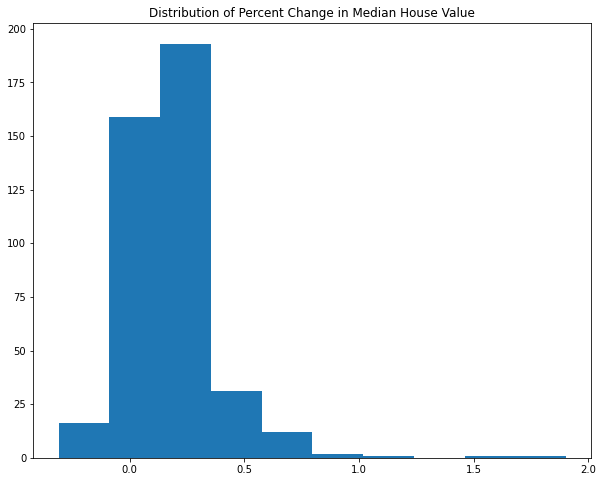

In [4]:
plt.figure(figsize=(10,8))
plt.hist(df_pctchange['Median House Value'])
plt.title('Distribution of Percent Change in Median House Value')

plt.show()

In [5]:
df.columns

Index(['Unnamed: 0', 'tpop', 'pnhwhite', 'pnhasn', 'pnhblk', 'phisp',
       'nhwhite', 'nhasn', 'nhblk', 'hisp', 'medinc', 'rent', 'houseval',
       'pcol', 'tpop2', 'Percent of Total Population Male',
       'Percent of Male Population Under 10',
       'Percent of Male Population 10 to 14',
       'Percent of Male Population 18 to 21',
       'Percent of Male Population 22 to 29',
       'Percent of Male Population 30 to 39',
       'Percent of Male Population 40 to 54',
       'Percent of Male Population 55 to 64',
       'Percent of Male Population 65 to 74',
       'Percent of Male Population 75 to 85',
       'Percent of Male Population Over 85',
       'Percent of Total Population Female',
       'Percent of Female Population Under 10',
       'Percent of Female Population 10 to 14',
       'Percent of Female Population 18 to 21',
       'Percent of Female Population 22 to 29',
       'Percent of Female Population 30 to 39',
       'Percent of Female Population 40 to 54',
    

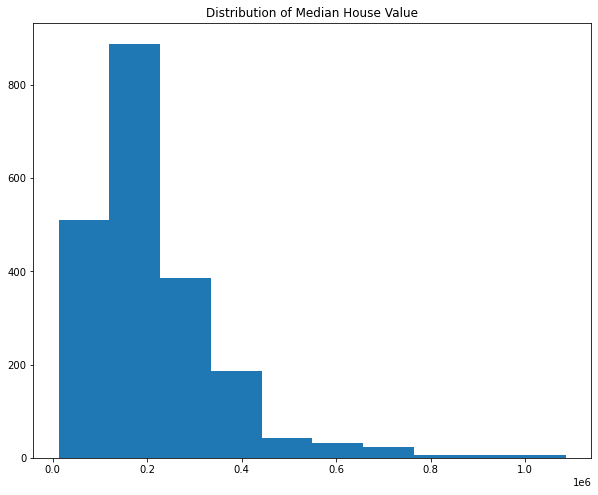

In [6]:
plt.figure(figsize=(10,8))
plt.hist(df['houseval'])
plt.title('Distribution of Median House Value')


plt.show()

It seems that most tracts had median house prices in the 200,000 range, with some outliers all the way up to median home prices of 1,000,000. 

Let's now see which tract experienced the highest percent change in median house price and then try to determine how much the actual value changed using our main dataframe. 

In [7]:
df_sorted = df_pctchange.sort_values('Median House Value', ascending=False)
print(df_sorted.head()['Median House Value'])
print(df_sorted.head()['GEOID'])

203    1.901998
195    1.489816
65     1.199313
340    0.978466
378    0.827306
Name: Median House Value, dtype: float64
203    37119000900
195    37119004700
65     37183050600
340    37183050900
378    37119005523
Name: GEOID, dtype: int64


In [8]:
df_2019 = df.loc[df['Year']==2019]
df_2015 = df.loc[df['Year']==2015]


top_geo = [37119000900, 37119004700, 37183050600, 37183050900, 37119005523]
val_15 = []
val_19 = []
price_change = []

for geo in top_geo:
    val_2015 = df_2015.at[geo, 'houseval']
    val_2019 = df_2019.at[geo, 'houseval']
    
    val_15.append(val_2015)
    val_19.append(val_2019)    
    price_change.append(val_2019 - val_2015)
    
print(top_geo, price_change, val_15, val_19)



[37119000900, 37119004700, 37183050600, 37183050900, 37119005523] [199900.0, 153600.0, 209400.0, 145400.0, 91500.0] [105100.0, 103100.0, 174600.0, 148600.0, 110600.0] [305000.0, 256700.0, 384000.0, 294000.0, 202100.0]


Between 2015 and 2019, the tract with the highest percent change in median house value saw an increase in 199,900. The median house price rose from 105,100 to 305,000. This would have been a great place to invest! It would be useful at this point to take a look at where these top 5 GEOIDS are actually located, so let's get the lat and long information from the Census Bureau and see where these areas were located.

1) 37119000900 - 

2) 37119004700 - 

3) 37183050600 - 

4) 37183050900 - 

5) 37119005523 - 


Text in regard to where our highest percent changes occured. 

The point of this project is to determine what values we can use to predict the change in housing prices over a given time period. So, let's see if we can figure out the values with the highest correlation to percent change in the median house price from our percent change dataframe. 

<AxesSubplot:>

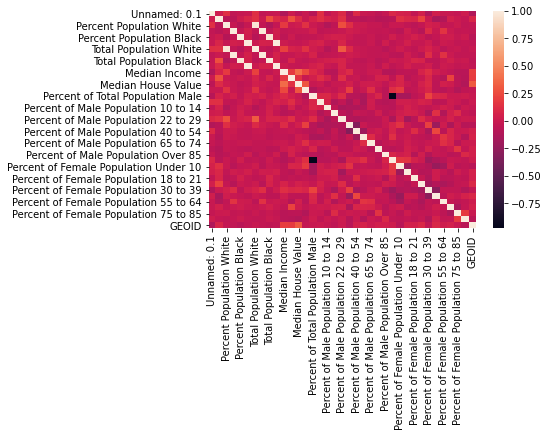

In [9]:
corr = df_pctchange.corr()
sns.heatmap(corr)

In [10]:
print(corr['Median House Value'])

Unnamed: 0.1                            -0.059090
Total Population                         0.113740
Percent Population White                 0.027034
Percent Population Asian                -0.007170
Percent Population Black                -0.048095
Percent Population Hispanic             -0.025662
Total Population White                   0.047758
Total Population Asian                   0.011269
Total Population Black                  -0.014180
Total Population Hispanic               -0.023343
Median Income                            0.384319
Median Rent                              0.143912
Median House Value                       1.000000
Percent with College Education           0.295281
Percent of Total Population Male        -0.005889
Percent of Male Population Under 10      0.018094
Percent of Male Population 10 to 14     -0.051409
Percent of Male Population 18 to 21     -0.006036
Percent of Male Population 22 to 29      0.000546
Percent of Male Population 30 to 39      0.046370


In [11]:
corr2 = df.corr()
print(corr2['houseval'])

Unnamed: 0                               0.046449
tpop                                    -0.028275
pnhwhite                                 0.703297
pnhasn                                   0.058289
pnhblk                                  -0.621295
phisp                                   -0.406853
nhwhite                                  0.489761
nhasn                                    0.046658
nhblk                                   -0.472619
hisp                                    -0.332258
medinc                                   0.810462
rent                                     0.442605
houseval                                 1.000000
pcol                                     0.813366
tpop2                                   -0.028275
Percent of Total Population Male         0.052411
Percent of Male Population Under 10     -0.230509
Percent of Male Population 10 to 14     -0.036861
Percent of Male Population 18 to 21     -0.145985
Percent of Male Population 22 to 29     -0.168207


It makes sense that the value with the highest correlation to housing price changes would be to the change in the median income of a tract. In all likelihood, this is also tied to the percentage of people with college educations. The next findings are unfortunate, and show that there is fairly strong correlations to racial and ethnic population makeup and the median home prices in the tract. A rise in the percent of population that is white has a positive correlation to housing price changes, and a rise in black and hispanic population shows a negative correlation. The percent of population that is asian seems to have little to no correlation to housing price.  

# Summary

The distibution of the percent change and the actual value was explored, showing that finding values higher in the distribution of the percent change represents a significant investing opportunity if these values can be properly predicted. The values that showed the highest correlation to housing price were median househould income, education levels and racial and ethnic makeup of the tracts that were observed. 